In [250]:
"""Nombre: Mauricio Juárez Sánchez
   Matrícula: A01660336
   M1.Actividad"""

'Nombre: Mauricio Juárez Sánchez\n   Matrícula: A01660336\n   M1.Actividad'

In [251]:
"""Entradas:
* Habitación de MxN espacios - Cumple
* Número de Agentes - Cumple
* Porcentaje de celdas inicialmente sucias - Falta
* Tiempo máximo de ejecución - Falta
"""

"""Simulación:
* Inicializa las celdas sucias en ubicaciones aleatorias - Cumple
* Todos los agentes empiezan en la celda [1,1] - Cumple
* Sí la celda está sucia, aspira - Falta
* Sí la celda está limpia, el agente elige una dirección aleatoria para moverse (unas de las 8 celdas vecinas)  - Falta
* Al elegir la acción del movimiento, sí no puede moverse allí permanecerá en la misma celda. - Falta
* Se ejecuta en el tiempo máximo establecido - Falta"""

"""Recopilar siguiente información:
* Tiempo necesario para que las celdas estén limpias ( o se haya llegado al tiempo máximo).
* Porcentaje de celdas limpias después del termino de la simulación.
* Número de movimientos realizados por todos los agentes.
* Analiza como la cantidad de agentes impacta el tiempo dedicado, así como la cantidad de movimientos realizados.
* Desarrollar un informe con lo observado.
"""

'Recopilar siguiente información:\n* Tiempo necesario para que las celdas estén limpias ( o se haya llegado al tiempo máximo).\n* Porcentaje de celdas limpias después del termino de la simulación.\n* Número de movimientos realizados por todos los agentes.\n* Analiza como la cantidad de agentes impacta el tiempo dedicado, así como la cantidad de movimientos realizados.\n* Desarrollar un informe con lo observado.\n'

In [252]:
import mesa
import random
import numpy as np
class RobotAgent(mesa.Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        
    def move(self):
        possible_steps = self.model.grid.get_neighborhood(self.pos, moore = True, include_center = False)
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)
        
    def step(self):
        self.move()
        print(str("Agente " + str(self.unique_id) + " limpia en " + str(self.pos)))
                
    #Función para realizar movimiento
    

In [253]:
class RobotModel(mesa.Model):
    saltos = 0
    def __init__(self,N,width,height,porcentaje):
        #Cantidad de agentes
        self.num_agents = N
        self.grid = mesa.space.MultiGrid(width, height, torus = True)
        #Tipo de activación de agentes
        #Activando todos los agentes a la vez
        self.schedule = mesa.time.SimultaneousActivation(self)
        
       
        #Determinando la cantidad de bloques sucios
        bloques_sucios = int( width * height * (porcentaje/100))
        print(bloques_sucios)
        #Creando tablero de un tamaño dado, es para checar el status de limpieza
        list = []
        list1 = [True,False]
        tablero = [[random.choice(list1)] * width for i in range(height)]
        print(tablero)
        #AQUÍ TERMINA CREACIÓN DEL TABLERO
        print("Todos los agentes inician en [0, 0]")
        #Creando agentes
        for i in range(self.num_agents):
            a = RobotAgent(i, self)
            self.schedule.add(a)
            
            #Inicializando todo robot en celda (1,1)
            x = 0
            y = 0
            #Con este método posicionamos al agente "a" en la celda (1,1)
            self.grid.place_agent(a,(x,y))
    #Llamamos a esta función cada que deseamos realizar un step.
    def step(self):
        self.saltos += 1
        print("Step número: " + str(self.saltos))
        self.schedule.step()

In [254]:
model = RobotModel(3,10,10,40)
model.step()
model.step()
model.step()

40
[[False, False, False, False, False, False, False, False, False, False], [False, False, False, False, False, False, False, False, False, False], [False, False, False, False, False, False, False, False, False, False], [True, True, True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True, True, True], [False, False, False, False, False, False, False, False, False, False], [False, False, False, False, False, False, False, False, False, False]]
Todos los agentes inician en [0, 0]
Step número: 1
Agente 0 limpia en (1, 0)
Agente 1 limpia en (0, 9)
Agente 2 limpia en (9, 1)
Step número: 2
Agente 0 limpia en (0, 1)
Agente 1 limpia en (1, 8)
Agente 2 limpia en (9, 0)
Step número: 3
Agente 0 limpia en (1, 2)
Agente 1 limpia en (0, 9)
Agente 2 limpia en (0, 9)


<IPython.core.display.Javascript object>


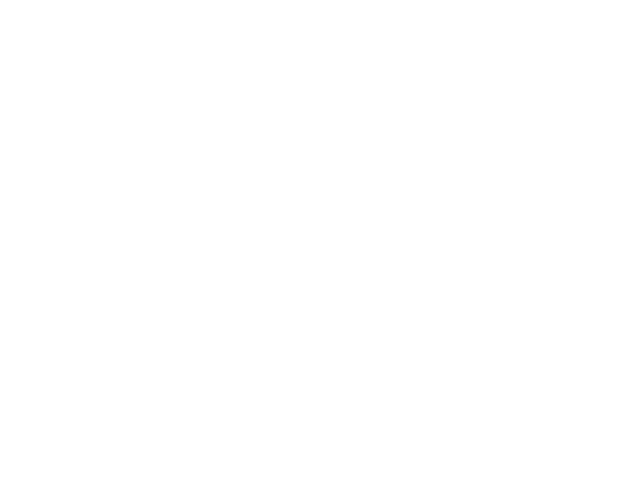

In [255]:
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation





agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell in model.grid.coord_iter():
    cell_content, x, y = cell
    agent_count = len(cell_content)
    agent_counts[x][y] = agent_count
plt.imshow(agent_counts, interpolation="nearest")
plt.colorbar()


<IPython.core.display.Javascript object>


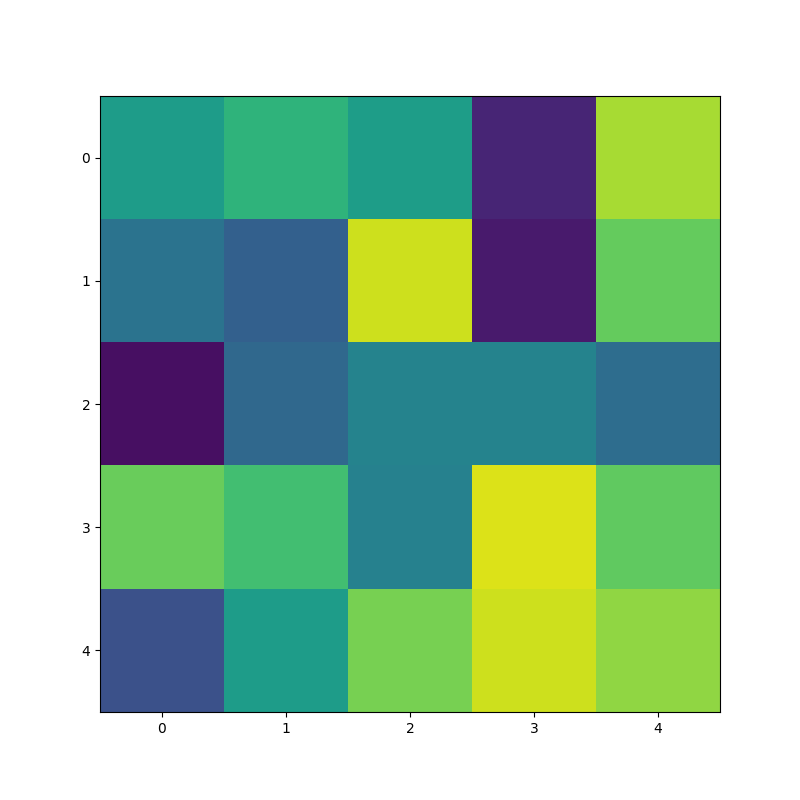

Done!


In [256]:
# Usually we use `%matplotlib inline`. However we need `notebook` for the anim to render in the notebook.
%matplotlib notebook

import random
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import matplotlib.animation as animation


fps = 30
nSeconds = 5
snapshots = [ np.random.rand(5,5) for _ in range( nSeconds * fps ) ]

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure( figsize=(8,8) )

a = snapshots[0]
im = plt.imshow(a, interpolation='none', aspect='auto', vmin=0, vmax=1)

def animate_func(i):
    if i % fps == 0:
        print( '.', end ='' )

    im.set_array(snapshots[i])
    return [im]

anim = animation.FuncAnimation(
                               fig, 
                               animate_func, 
                               frames = nSeconds * fps,
                               interval = 20000 / fps, # in ms
                               )


print('Done!')

# plt.show()  # Not required, it seems!